In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[0:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

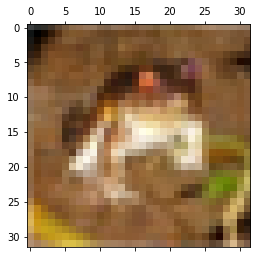

In [6]:

plt.matshow(x_train[0])

In [7]:
x_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [8]:
y_train=keras.utils.to_categorical(y_train,num_classes=10)


In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
x_train=x_train/255
x_test=x_test/255

In [11]:
model=keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(32,32,3)))
model.add(keras.layers.Dense(3000,activation='relu'))
model.add(keras.layers.Dense(1000,activation='relu'))
model.add(keras.layers.Dense(10,activation='sigmoid'))

model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 14s 7ms/step - loss: 1.8133 - accuracy: 0.3522
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6227 - accuracy: 0.4273
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.5389 - accuracy: 0.4552
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4792 - accuracy: 0.4801
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4296 - accuracy: 0.4975
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3870 - accuracy: 0.5128
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3493 - accuracy: 0.5258
Epoch 8/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3176 - accuracy: 0.5387
Epoch 9/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2820 - accuracy: 0.5499
Epoch 10/50
1563/1563 [==============================] - 10s 7ms/step - l

In [12]:
np.argmax(model.predict(x_test)[1] )

8

In [13]:
y_test[1][0]

8

In [14]:
y_test.shape

(10000, 1)

In [15]:
y_predict=model.predict(x_test)
y_predict[0]

array([5.4543126e-01, 1.8799925e-01, 8.2272464e-01, 9.9761331e-01,
       7.7435547e-01, 8.6455131e-01, 6.4101368e-02, 7.7578868e-04,
       2.4007572e-01, 7.7465987e-01], dtype=float32)

In [16]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[0]


3

In [17]:
cm=tensorflow.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

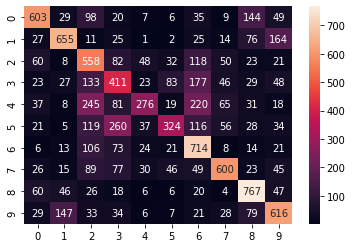

In [20]:
import seaborn as sns
sns.heatmap(cm,annot=True, fmt='d')